In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv("Crop_predict dataset_F.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2052, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2052 non-null   int64  
 1   P            2052 non-null   int64  
 2   K            2052 non-null   int64  
 3   temperature  2052 non-null   float64
 4   humidity     2052 non-null   float64
 5   ph           2052 non-null   float64
 6   rainfall     2052 non-null   float64
 7   label        2052 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.4+ KB


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.duplicated().sum()

np.int64(0)

In [8]:
 crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,50.324074,53.533138,48.426413,25.577607,71.554852,6.470401,102.543009
std,36.679243,33.197992,51.080514,5.084785,22.306495,0.778735,54.964535
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.682008,60.442560,5.969727,64.028722
50%,37.000000,51.000000,32.000000,25.566354,80.532760,6.424285,94.404190
75%,84.000000,68.000000,49.000000,28.563593,90.029164,6.926010,120.997164
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop_numeric = crop.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = crop_numeric.corr()

# Display the correlation matrix
correlation_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.238646,-0.142971,0.035116,0.195762,0.085667,0.047984
P,-0.238646,1.000000,0.737980,-0.134027,-0.118188,-0.144846,-0.046267
K,-0.142971,0.737980,1.000000,-0.166767,0.193253,-0.171997,-0.044146
temperature,0.035116,-0.134027,-0.166767,1.000000,0.207062,-0.017287,-0.030088
humidity,0.195762,-0.118188,0.193253,0.207062,1.000000,-0.007911,0.092561
ph,0.085667,-0.144846,-0.171997,-0.017287,-0.007911,1.000000,-0.102537
rainfall,0.047984,-0.046267,-0.044146,-0.030088,0.092561,-0.102537,1.000000


<Axes: >

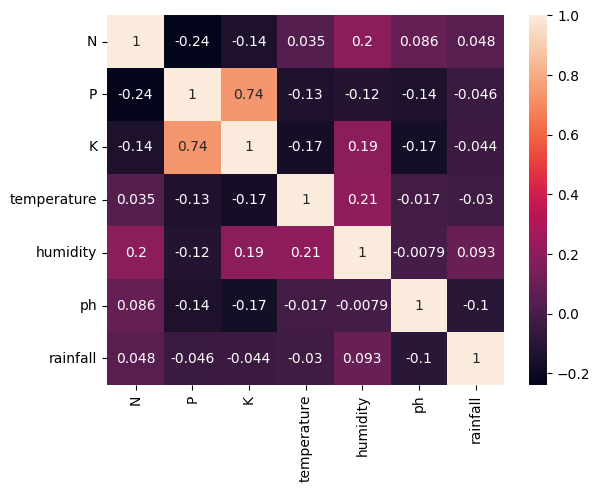

In [10]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cbar=True)

In [11]:
crop.label.value_counts()

label
maize          100
apple          100
orange         100
muskmelon      100
mungbean        95
chickpea        95
watermelon      95
banana          95
kidneybeans     94
rice            94
lentil          94
mothbeans       94
pomegranate     94
blackgram       94
pigeonpeas      93
mango           92
grapes          90
papaya          90
cotton          90
coffee          85
coconut         84
jute            84
Name: count, dtype: int64

In [12]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
crop['label'].unique().size

22

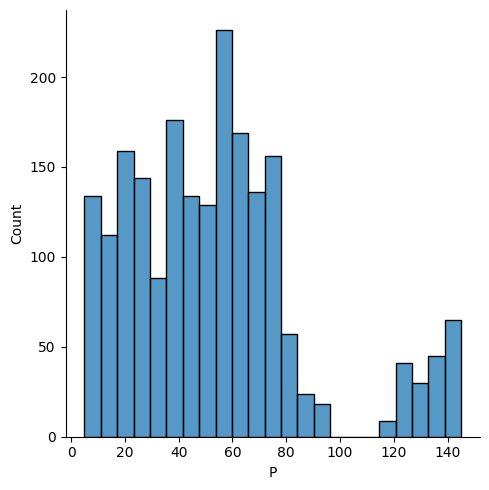

In [14]:
import matplotlib.pyplot as plt
sns.displot(crop['P'])
plt.show()

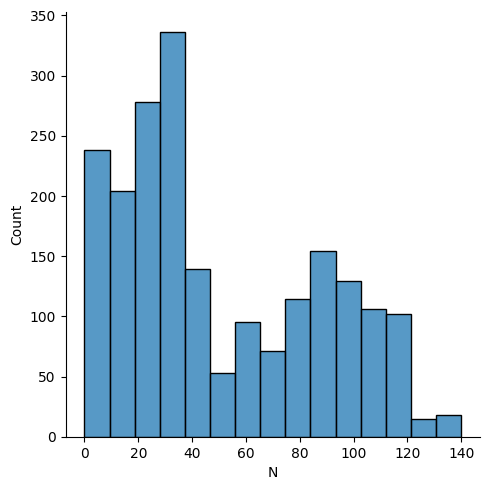

In [15]:
 import matplotlib.pyplot as plt
sns.displot(crop['N'])
plt.show()

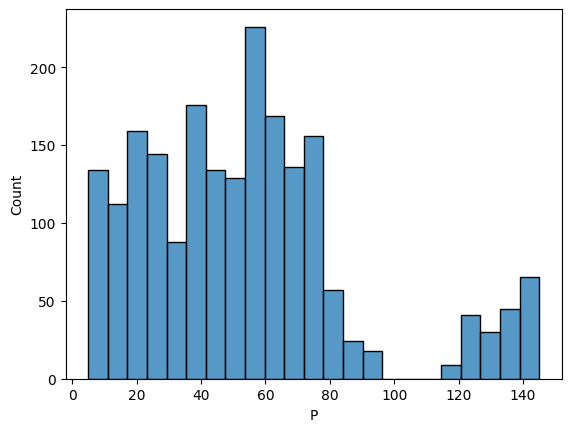

In [16]:
import matplotlib.pyplot as plt
sns.histplot(crop['P'])
plt.show()

In [17]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [19]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [20]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

In [21]:
crop.label.value_counts()

label
2     100
8     100
7     100
9     100
17     95
21     95
10     95
13     95
20     94
1      94
15     94
18     94
14     94
16     94
19     93
12     92
11     90
6      90
4      90
22     85
5      84
3      84
Name: count, dtype: int64

In [22]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [23]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [26]:
X_train.shape

(1846, 7)

In [27]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [28]:
X_train

array([[0.02142857, 0.93571429, 1.        , ..., 0.77679708, 0.44010423,
        0.18392488],
       [0.65      , 0.36428571, 0.16      , ..., 0.77354026, 0.44456757,
        0.89561228],
       [0.64285714, 0.25      , 0.17      , ..., 0.78862168, 0.48547236,
        0.61704466],
       ...,
       [0.15      , 0.11428571, 0.125     , ..., 0.43346045, 0.29534309,
        0.28942388],
       [0.62857143, 0.        , 0.21      , ..., 0.84476668, 0.49103051,
        0.07528064],
       [0.04285714, 0.17857143, 0.175     , ..., 0.90053069, 0.44424134,
        0.31167599]])

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [31]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()

}

In [32]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Example: Assuming you already have a dictionary of models defined
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME')  # Use SAMME to avoid deprecation
}

# Dictionary to store accuracy scores
accuracy_results = {}

# Iterate through each model in the dictionary
for name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy score
        score = accuracy_score(y_test, y_pred)
        
        # Store the result
        accuracy_results[name] = score
        
        # Print accuracy score
        print(f"{name} model with accuracy: {score}")
    
    except Exception as e:
        # Handle any model errors during training or prediction
        print(f"Error with {name}: {str(e)}")

# After the loop, print a summary of results
print("\nSummary of model performance:")
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy}")


LogisticRegression model with accuracy: 0.9805825242718447
GaussianNB model with accuracy: 1.0
SVC model with accuracy: 0.9902912621359223
KNeighborsClassifier model with accuracy: 0.9757281553398058
DecisionTreeClassifier model with accuracy: 0.9902912621359223
ExtraTreeClassifier model with accuracy: 0.9514563106796117
RandomForestClassifier model with accuracy: 1.0
BaggingClassifier model with accuracy: 0.9951456310679612
GradientBoostingClassifier model with accuracy: 0.9854368932038835
AdaBoostClassifier model with accuracy: 0.19902912621359223

Summary of model performance:
LogisticRegression: 0.9805825242718447
GaussianNB: 1.0
SVC: 0.9902912621359223
KNeighborsClassifier: 0.9757281553398058
DecisionTreeClassifier: 0.9902912621359223
ExtraTreeClassifier: 0.9514563106796117
RandomForestClassifier: 1.0
BaggingClassifier: 0.9951456310679612
GradientBoostingClassifier: 0.9854368932038835
AdaBoostClassifier: 0.19902912621359223


In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9805825242718447
GaussianNB model with accuracy: 1.0
SVC model with accuracy: 0.9902912621359223
KNeighborsClassifier model with accuracy: 0.9757281553398058
DecisionTreeClassifier model with accuracy: 0.9854368932038835
ExtraTreeClassifier model with accuracy: 0.9514563106796117
RandomForestClassifier model with accuracy: 1.0
BaggingClassifier model with accuracy: 1.0
GradientBoostingClassifier model with accuracy: 0.9854368932038835
AdaBoostClassifier model with accuracy: 0.19902912621359223


In [34]:
randfc = RandomForestClassifier()
randfc.fit(X_train, y_train)
y_pred = randfc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [35]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [36]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randfc.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [37]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [38]:
N=90
P=42 
K=43
temperature=20.879744
humidity=82.002744
ph=6.502985	
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [39]:
predict

array([6])

In [40]:
import pickle
pickle.dump(randfc, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))